In [30]:
import findspark
findspark.init()

import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn.metrics as sm
from pyspark.mllib.clustering import KMeans
from pyspark.mllib.clustering import KMeansModel
import pandas as pd
import numpy as np
from scipy import cluster

NameError: name 'SparkContext' is not defined

In [31]:
from pyspark import SparkContext

In [32]:
sc=SparkContext()

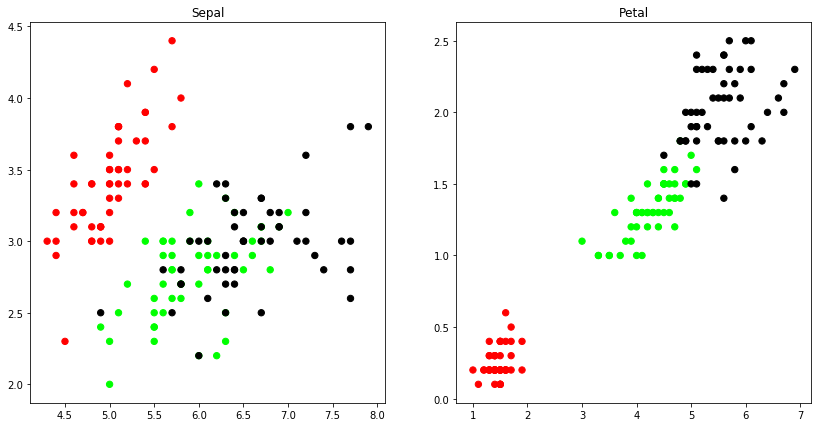

In [33]:
import pandas as pd
import numpy as np
from scipy import cluster
%matplotlib inline


iris = datasets.load_iris()

iris.data
iris.feature_names
iris.target
iris.target_names

x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']


# Set the size of the plot
plt.figure(figsize=(14,7))

# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Sepal')
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Petal')

plt.show()


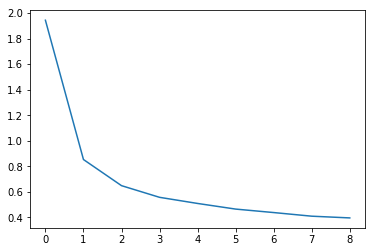

In [34]:
#Elbow
initial = [cluster.vq.kmeans(np.array(x),i) for i in range(1,10)]

#Plot centroids and distortion
plt.plot([var for (cent,var) in initial])
plt.show()

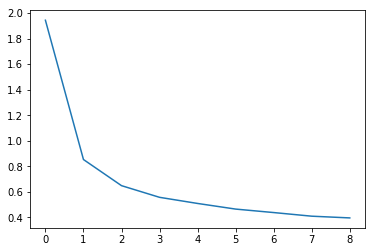

In [35]:
#Plot centroids and distortion
plt.plot([var for (cent,var) in initial])
plt.show()

In [36]:
data = sc.textFile('/home/vagrant/corso/data/Clustering/iris_data.txt')
from numpy import array

In [37]:
def parsed(line):
    return np.array([float(x) for x in line.split(',')])

dt = data.map(parsed)  


o = data.map(lambda line: array([float(x) for x in line.replace(',', ' ').split(' ')]))


model = KMeans.train(dt,3)

print("Final centers: " + str(model.clusterCenters))  
print("Total Cost: " + str(model.computeCost(dt)))  


#----------------------------------------------------------


Final centers: [array([ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097]), array([ 5.006,  3.418,  1.464,  0.244]), array([ 6.85      ,  3.07368421,  5.74210526,  2.07105263])]
Total Cost: 78.9408414261


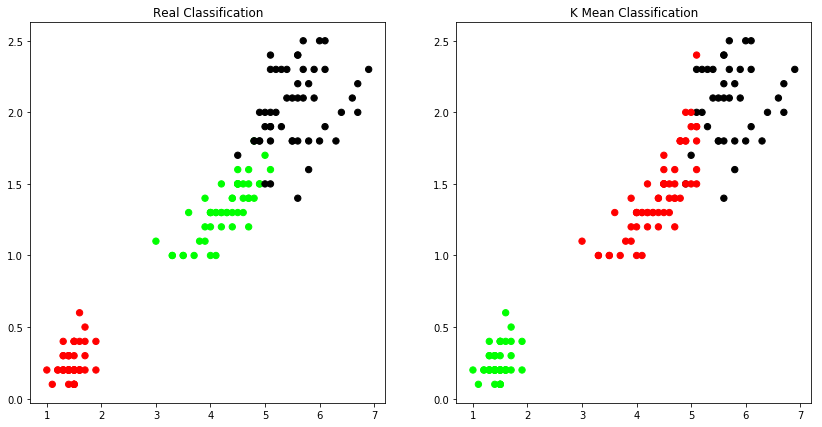

In [38]:
pred=model.predict(dt).collect()
pred = pd.Series(pred)


# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))

# Create a colormap
colormap = np.array(['red', 'lime','black','blue'])

# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')

# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width,c=colormap[pred],s=40)
plt.title('K Mean Classification')


plt.show()

In [39]:
predY = np.choose(pred, [1, 0, 2]).astype(np.int64)



# Performance Metrics
print 'error:', sm.accuracy_score(y, predY)

error: 0.893333333333
